In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
NHL = pd.read_excel('C:/Users/trent/OneDrive/Documents/Repositories/Pythagorean_Expectations_Predictions/data/nhl-202425-asplayed.xlsx')
print(NHL.columns.tolist())

['Date', 'Start Time (Sask)', 'Start Time (ET)', 'Visitor', 'VScore', 'Home', 'HScore', 'Status']


In [5]:
NHL

,Date,Start Time (Sask),Start Time (ET),Visitor,VScore,Home,HScore,Status
0,2024-10-04,11:00:00,13:00:00,New Jersey Devils,4,Buffalo Sabres,1,Regulation
1,2024-10-05,08:00:00,10:00:00,Buffalo Sabres,1,New Jersey Devils,3,Regulation
2,2024-10-08,14:30:00,16:30:00,St. Louis Blues,3,Seattle Kraken,2,Regulation
3,2024-10-08,17:00:00,19:00:00,Boston Bruins,4,Florida Panthers,6,Regulation
4,2024-10-08,20:00:00,22:00:00,Chicago Blackhawks,2,Utah Hockey Club,5,Regulation
...,...,...,...,...,...,...,...,...
1307,2025-04-17,17:00:00,19:00:00,Carolina Hurricanes,5,Ottawa Senators,7,Regulation
1308,2025-04-17,17:00:00,19:00:00,Tampa Bay Lightning,0,New York Rangers,4,Regulation
1309,2025-04-17,17:00:00,19:00:00,Washington Capitals,2,Pittsburgh Penguins,5,Regulation
1310,2025-04-17,17:00:00,19:00:00,New York Islanders,1,Columbus Blue Jackets,6,Regulation


In [7]:
NHL25 = NHL[['Visitor','Home','VScore','HScore','Date']]
NHL25

,Visitor,Home,VScore,HScore,Date
0,New Jersey Devils,Buffalo Sabres,4,1,2024-10-04
1,Buffalo Sabres,New Jersey Devils,1,3,2024-10-05
2,St. Louis Blues,Seattle Kraken,3,2,2024-10-08
3,Boston Bruins,Florida Panthers,4,6,2024-10-08
4,Chicago Blackhawks,Utah Hockey Club,2,5,2024-10-08
...,...,...,...,...,...
1307,Carolina Hurricanes,Ottawa Senators,5,7,2025-04-17
1308,Tampa Bay Lightning,New York Rangers,0,4,2025-04-17
1309,Washington Capitals,Pittsburgh Penguins,2,5,2025-04-17
1310,New York Islanders,Columbus Blue Jackets,1,6,2025-04-17


In [8]:
NHL25['hwin']= np.where(NHL25['HScore']>NHL25['VScore'],1,0)
NHL25['awin']= np.where(NHL25['HScore']<NHL25['VScore'],1,0)
NHL25['count']=1
NHL25

C:\Users\trent\AppData\Local\Temp\ipykernel_13004\3504457057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL25['hwin']= np.where(NHL25['HScore']>NHL25['VScore'],1,0)
C:\Users\trent\AppData\Local\Temp\ipykernel_13004\3504457057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NHL25['awin']= np.where(NHL25['HScore']<NHL25['VScore'],1,0)


,Visitor,Home,VScore,HScore,Date,hwin,awin,count
0,New Jersey Devils,Buffalo Sabres,4,1,2024-10-04,0,1,1
1,Buffalo Sabres,New Jersey Devils,1,3,2024-10-05,1,0,1
2,St. Louis Blues,Seattle Kraken,3,2,2024-10-08,0,1,1
3,Boston Bruins,Florida Panthers,4,6,2024-10-08,1,0,1
4,Chicago Blackhawks,Utah Hockey Club,2,5,2024-10-08,1,0,1
...,...,...,...,...,...,...,...,...
1307,Carolina Hurricanes,Ottawa Senators,5,7,2025-04-17,1,0,1
1308,Tampa Bay Lightning,New York Rangers,0,4,2025-04-17,1,0,1
1309,Washington Capitals,Pittsburgh Penguins,2,5,2025-04-17,1,0,1
1310,New York Islanders,Columbus Blue Jackets,1,6,2025-04-17,1,0,1


In [10]:
NHLhome = NHL25.groupby('Home')[['hwin','HScore','VScore','count']].sum().reset_index()
NHLhome = NHLhome.rename(columns={'Home':'team','VScore':'VisSh','HScore':'HomSh','count':'Gh'})
NHLhome

,team,hwin,HomSh,VisSh,Gh
0,Anaheim Ducks,21,123,128,41
1,Boston Bruins,20,120,117,41
2,Buffalo Sabres,23,144,134,41
3,Calgary Flames,23,122,113,41
4,Carolina Hurricanes,31,155,101,41
5,Chicago Blackhawks,15,123,146,41
6,Colorado Avalanche,26,145,115,41
7,Columbus Blue Jackets,26,165,124,41
8,Dallas Stars,28,141,103,41
9,Detroit Red Wings,22,128,125,41


In [11]:
NHLaway = NHL25.groupby('Visitor')[['awin','HScore','VScore','count']].sum().reset_index()
NHLaway = NHLaway.rename(columns={'Visitor':'team','VScore':'VisSa','HScore':'HomSa','count':'Ga'})
NHLaway

,team,awin,HomSa,VisSa,Ga
0,Anaheim Ducks,14,135,98,41
1,Boston Bruins,13,155,102,41
2,Buffalo Sabres,13,155,125,41
3,Calgary Flames,18,125,103,41
4,Carolina Hurricanes,16,132,111,41
5,Chicago Blackhawks,10,150,103,41
6,Colorado Avalanche,23,119,132,41
7,Columbus Blue Jackets,14,144,108,41
8,Dallas Stars,22,121,136,41
9,Detroit Red Wings,17,134,110,41


In [12]:
NHL25 = pd.merge(NHLhome,NHLaway,on='team')
NHL25

,team,hwin,HomSh,VisSh,Gh,awin,HomSa,VisSa,Ga
0,Anaheim Ducks,21,123,128,41,14,135,98,41
1,Boston Bruins,20,120,117,41,13,155,102,41
2,Buffalo Sabres,23,144,134,41,13,155,125,41
3,Calgary Flames,23,122,113,41,18,125,103,41
4,Carolina Hurricanes,31,155,101,41,16,132,111,41
5,Chicago Blackhawks,15,123,146,41,10,150,103,41
6,Colorado Avalanche,26,145,115,41,23,119,132,41
7,Columbus Blue Jackets,26,165,124,41,14,144,108,41
8,Dallas Stars,28,141,103,41,22,121,136,41
9,Detroit Red Wings,22,128,125,41,17,134,110,41


In [15]:
NHL25['W']=NHL25['hwin']+NHL25['awin']
NHL25['G']=NHL25['Gh']+NHL25['Ga']
NHL25['Goals']=NHL25['HomSh']+NHL25['VisSa']
NHL25['GoalsA']=NHL25['VisSh']+NHL25['HomSa']
NHL25

,team,hwin,HomSh,VisSh,Gh,awin,HomSa,VisSa,Ga,W,G,GA,wpc,pyth,Goals,GoalsA
0,Anaheim Ducks,21,123,128,41,14,135,98,41,35,82,263,0.158371,0.5,221,263
1,Boston Bruins,20,120,117,41,13,155,102,41,33,82,272,0.148649,0.5,222,272
2,Buffalo Sabres,23,144,134,41,13,155,125,41,36,82,289,0.133829,0.5,269,289
3,Calgary Flames,23,122,113,41,18,125,103,41,41,82,238,0.182222,0.5,225,238
4,Carolina Hurricanes,31,155,101,41,16,132,111,41,47,82,233,0.176692,0.5,266,233
5,Chicago Blackhawks,15,123,146,41,10,150,103,41,25,82,296,0.110619,0.5,226,296
6,Colorado Avalanche,26,145,115,41,23,119,132,41,49,82,234,0.176895,0.5,277,234
7,Columbus Blue Jackets,26,165,124,41,14,144,108,41,40,82,268,0.146520,0.5,273,268
8,Dallas Stars,28,141,103,41,22,121,136,41,50,82,224,0.180505,0.5,277,224
9,Detroit Red Wings,22,128,125,41,17,134,110,41,39,82,259,0.163866,0.5,238,259


In [16]:
NHL25['wpc'] = NHL25['W']/NHL25['G']
NHL25['pyth'] = NHL25['Goals']**2/(NHL25['Goals']**2 + NHL25['GoalsA']**2)
NHL25

,team,hwin,HomSh,VisSh,Gh,awin,HomSa,VisSa,Ga,W,G,GA,wpc,pyth,Goals,GoalsA
0,Anaheim Ducks,21,123,128,41,14,135,98,41,35,82,263,0.426829,0.413872,221,263
1,Boston Bruins,20,120,117,41,13,155,102,41,33,82,272,0.402439,0.399812,222,272
2,Buffalo Sabres,23,144,134,41,13,155,125,41,36,82,289,0.439024,0.464204,269,289
3,Calgary Flames,23,122,113,41,18,125,103,41,41,82,238,0.500000,0.471944,225,238
4,Carolina Hurricanes,31,155,101,41,16,132,111,41,47,82,233,0.573171,0.565844,266,233
5,Chicago Blackhawks,15,123,146,41,10,150,103,41,25,82,296,0.304878,0.368269,226,296
6,Colorado Avalanche,26,145,115,41,23,119,132,41,49,82,234,0.597561,0.583557,277,234
7,Columbus Blue Jackets,26,165,124,41,14,144,108,41,40,82,268,0.487805,0.509241,273,268
8,Dallas Stars,28,141,103,41,22,121,136,41,50,82,224,0.609756,0.604618,277,224
9,Detroit Red Wings,22,128,125,41,17,134,110,41,39,82,259,0.475610,0.457822,238,259


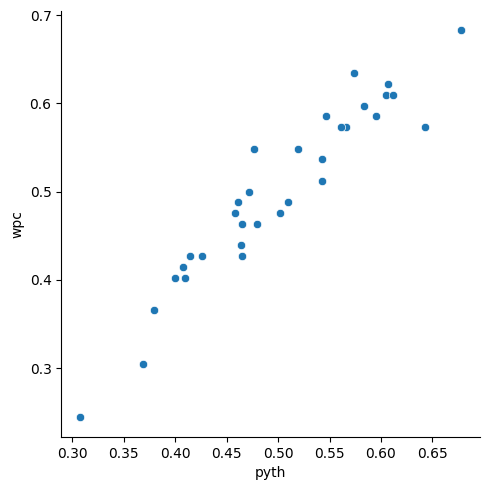

In [17]:
sns.relplot(x="pyth", y="wpc", data = NHL25)

In [18]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth',data=NHL25).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     274.6
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.21e-16
Time:                        15:39:46   Log-Likelihood:                 65.936
No. Observations:                  32   AIC:                            -127.9
Df Residuals:                      30   BIC:                            -124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0395      0.033     -1.194      0.242      -0.107       0.028
pyth           1.0763      0.065     16.572      0.000       0.944       1.209
==============================================================================
Omnibus:                        1.488   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                0.513
Skew:                          -0.109   Prob(JB):                        0.774
Kurtosis:                       3.580   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""